# Question 4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import sortedcontainers
import copy
%matplotlib inline

(1207, 1207)


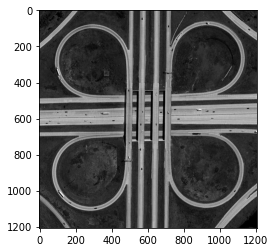

In [2]:
r = cv2.imread("../images/roads.jpg")
rG = cv2.cvtColor(r,cv2.COLOR_BGR2GRAY)
print(rG.shape)
plt.imshow(rG,cmap='gray')

## <b>Part 2</b>

In [3]:
def padding(pic,k):
    padNum = math.floor(k/2)
    padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum)))
    padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum] = pic
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    padPic[xStart:xEnd, yStart:yEnd] = pic
    return padPic

def dilate(img,k1,k2):
    k = max(k1,k2)
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k1,k2),dtype='uint8')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-k1//2:i+k1//2+1,j-k2//2:j+k2//2+1]
            vals = vals*StructE
            out[i,j] = np.max(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out


def erode(img,k1,k2):
    k = max(k1,k2)
    padPic = padding(img,k)
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    StructE = np.ones((k1,k2),dtype='uint8')
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            vals = padPic[i-k1//2:i+k1//2+1,j-k2//2:j+k2//2+1]
            vals = vals*StructE
            out[i,j] = np.min(vals)
    out = out[xStart:xEnd,yStart:yEnd]
    return out
def otsuT(img):
    listThem = img.flatten()
    minT = np.min(img)
    maxT = np.max(img)
    minV = -10
    minTh = -10
    listColors = np.arange(minT+0.5,maxT-0.5,0.5)
    for i in listColors:
        foreG = listThem[listThem >= i]
        vF = np.var(foreG)
        backG = listThem[listThem < i]
        vB = np.var(backG)
        sigmaF = vF*(len(foreG)/len(listThem)) + vB*(len(backG)/len(listThem))
        if sigmaF < minV or minV == -10:
            minV = sigmaF
            minTh = i
    return minTh.astype('uint8')

def gausFilter(img,s,q):
    k = math.floor(q/2)
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    sS = 2 * (s ** 2)
    kern = np.zeros([q,q])
    center = int(q/2)
    for i in range(q):
        for j in range(q):
            kern[i][j] = -1*((i-center)**2 + (j-center)**2)/s
    #For 3D
#     kern = np.dstack((kern,kern))
    for i in range(k,imgP.shape[0]-k):
        for j in range(k,imgP.shape[1]-k):
            kernCom = kern
            kernCom = np.exp(kernCom)
            out[i][j] = np.rint(np.sum(imgP[i-center:i+center+1,j-center:j+center+1]*kernCom,axis=(0,1))/np.sum(kernCom,axis=(0,1)))
    out = out[center:out.shape[0]-center,center:out.shape[1]-center]
    return out.astype('uint8')


def filt(img,ker):
    r = img.shape[0]
    c = img.shape[1]
    out = img.copy()
    xS = 1
    xE = img.shape[0] - 1
    yS = 1
    yE = img.shape[1] - 1
    for i in range(xS,xE):
        for j in range(yS,yE):
            KxS = i - 1
            KxE = i + 1
            KyS = j - 1
            KyE = j + 1
            imgK = img[KxS:KxE+1,KyS:KyE+1]
            present = 1
            for a in range(3):
                for b in range(3):
                    if ker[a,b] == -1:
                        continue
                    elif ker[a,b] != imgK[a,b]:
                        present = 0
            if present == 1:
                out[i,j] = 0
    return out


In [4]:
otT = otsuT(rG)

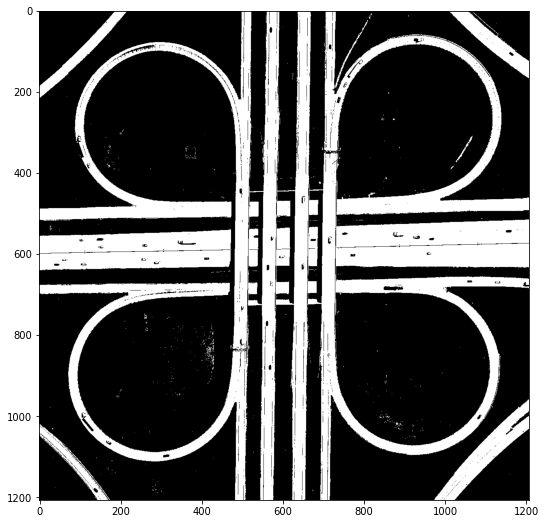

In [5]:
grey = cv2.threshold(rG,otT,255,cv2.THRESH_BINARY)[1]
plt.figure(figsize = (9,9))
plt.imshow(grey,cmap='gray')

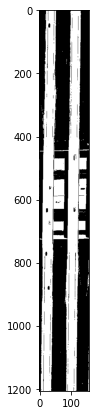

In [6]:
# plt.imshow(grey[:,500:750],cmap='gray')
straightR = grey[:,539:695].copy()
# testcanny = cv2.Canny(test1,0,10)
plt.figure(figsize = (7,7))
plt.imshow(straightR,cmap='gray')

In [7]:
test = straightR.copy()
#Closing
test = erode(dilate(test,7,7),7,7)
#Opening
test = dilate(erode(test,7,7),7,7)

In [8]:
test = test.astype('uint8')
# plt.figure(figsize = (15,15))
# plt.imshow(test,cmap='gray')

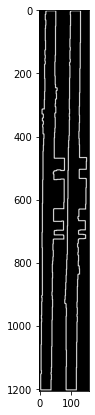

In [9]:
Rcanny = dilate(cv2.Canny(test,0 ,100),3,3)
plt.figure(figsize = (7,7))
plt.imshow(Rcanny,cmap='gray')

In [10]:
finalRoads = np.zeros_like(grey)
finalRoads[:,539:695] = Rcanny

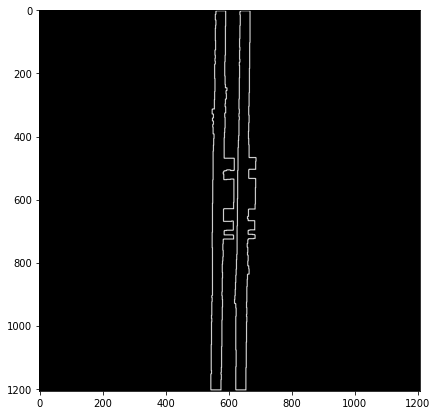

In [11]:
plt.figure(figsize = (7,7))
plt.imshow(finalRoads,cmap='gray')